In [9]:
import pandas as pd
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# read hdf file and check names of keys
fl = h5py.File('./data/singlecoil_test/file1000036.h5')

In [19]:
list(fl.keys())

['ismrmrd_header', 'kspace', 'mask']

In [18]:
dict(fl.attrs)

{'acceleration': 8,
 'acquisition': 'CORPD_FBK',
 'num_low_frequency': 15,
 'patient_id': 'd26849b8d06d857a253661f2700cbee0fdc18f6d1f56a9dfe814abc7e4e93ea4'}

For single-coil MRIs, k-space has the following shape: (number of slices, height, width)

MRIs are acquired as 3D volumes, the first dimension is the number of 2D slices.

In [43]:
fl['ismrmrd_header'].shape

()

In [20]:
volume_kspace = fl['kspace'][()]
print(volume_kspace.shape)
print(volume_kspace.dtype)

(33, 640, 372)
complex64


In [24]:
slice_kspace = volume_kspace[20]

In [16]:
def show_coils(data, cmap=None):
    fig = plt.figure(figsize=(15, 7))
    #for i, num in enumerate(slice_nums):
    #    plt.subplot(1, len(slice_nums), i + 1)
    plt.imshow(data, cmap=cmap)

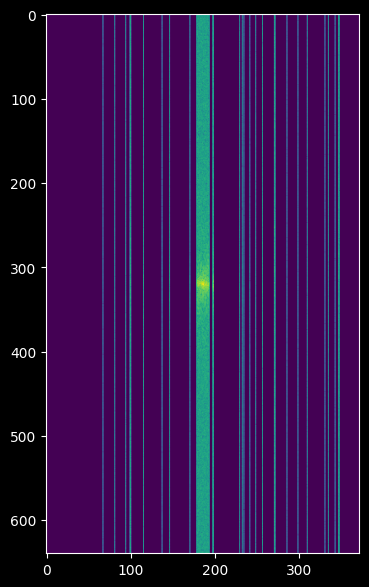

In [47]:
show_coils(np.log(np.abs(slice_kspace) + 1e-9))  # This shows coils 0, 5 and 10

In [2]:
from run_pretrained_unet_inference import download_model
import os

In [5]:
UNET_FOLDER = "https://dl.fbaipublicfiles.com/fastMRI/trained_models/unet/"
model = "knee_sc_leaderboard_state_dict.pt"

folder = "./models/pretrained"
path = f"{folder}/{model}"

if not os.path.exists(folder):
    os.makedirs(folder)

download_model(UNET_FOLDER + model, path)

In [5]:
# Check train files and see which ones are in the annotated list
train_path = "./data/singlecoil_train/"
train_files = os.listdir(train_path)
with open("./data/annotations/knee_file_list.csv") as f:
    annotated_files = f.readlines()
annotated_files = [f.strip() + ".h5" for f in annotated_files]

train_annotations = [f for f in train_files if f in annotated_files]
train_no_annotations = [f for f in train_files if f not in annotated_files]

print(f"Number of annotated files: {len(train_annotations)}")
print(f"Number of unannotated files: {len(train_no_annotations)}")


Number of annotated files: 973
Number of unannotated files: 0


In [19]:
# read one of the train files
fl = h5py.File(train_path + train_annotations[12])
fl.keys()

<KeysViewHDF5 ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']>

In [42]:
dict(fl.attrs)

{'acquisition': 'CORPDFS_FBK',
 'max': 0.00016777666877036693,
 'norm': 0.056826981264198606,
 'patient_id': 'e69f35ed4abf568974fe6cd55605e2985101f7125f1801a85ae75e924b1b5d87'}

In [20]:
volume_kspace = fl['kspace'][()]
print(volume_kspace.shape)
print(volume_kspace.dtype)

(40, 640, 322)
complex64


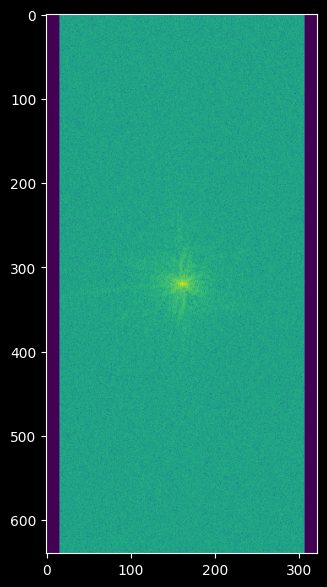

In [23]:
slice_kspace = volume_kspace[15]
show_coils(np.log(np.abs(slice_kspace) + 1e-9))  # This shows coils 0, 5 and 10

In [24]:
import fastmri
from fastmri.data import transforms as T

In [25]:
slice_kspace_t = T.to_tensor(slice_kspace)
slice_image = fastmri.ifft2c(slice_kspace_t)
slice_image_abs = fastmri.complex_abs(slice_image)

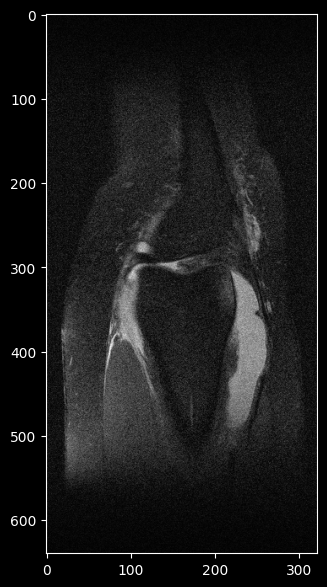

In [26]:
show_coils(slice_image_abs, cmap='gray')

In [10]:
df_annotations = pd.read_csv("./data/annotations/knee.csv")
df_annotations.head()

,file,slice,study_level,x,y,width,height,label
0,file1000001,14,No,90.0,173.0,35.0,10.0,Cartilage - Partial Thickness loss/defect
1,file1000001,15,No,93.0,173.0,39.0,10.0,Cartilage - Partial Thickness loss/defect
2,file1000001,15,No,117.0,162.0,20.0,12.0,Bone- Subchondral edema
3,file1000001,16,No,116.0,163.0,23.0,12.0,Bone- Subchondral edema
4,file1000001,18,No,191.0,186.0,44.0,8.0,Cartilage - Partial Thickness loss/defect


In [11]:
df_annotations[df_annotations.file == "file1000001"]

,file,slice,study_level,x,y,width,height,label
0,file1000001,14,No,90.0,173.0,35.0,10.0,Cartilage - Partial Thickness loss/defect
1,file1000001,15,No,93.0,173.0,39.0,10.0,Cartilage - Partial Thickness loss/defect
2,file1000001,15,No,117.0,162.0,20.0,12.0,Bone- Subchondral edema
3,file1000001,16,No,116.0,163.0,23.0,12.0,Bone- Subchondral edema
4,file1000001,18,No,191.0,186.0,44.0,8.0,Cartilage - Partial Thickness loss/defect
5,file1000001,19,No,196.0,186.0,40.0,11.0,Cartilage - Partial Thickness loss/defect
6,file1000001,20,No,197.0,188.0,34.0,8.0,Cartilage - Partial Thickness loss/defect
7,file1000001,20,No,264.0,122.0,17.0,39.0,Ligament - MCL Low-Mod Grade Sprain
8,file1000001,21,No,193.0,188.0,30.0,8.0,Cartilage - Full Thickness loss/defect
9,file1000001,21,No,262.0,121.0,21.0,45.0,Ligament - MCL Low-Mod Grade Sprain


In [ ]:
# get all annotations for a specific file and slice and merge them
